# Housing Price Regression Example

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,fireplace,basement,central_air,covered_parking_spaces,furnishingstatus
0,1330000,7420,4,2,3,no,no,yes,2,furnished
1,1225000,8960,4,4,4,no,no,yes,3,furnished
2,1225000,9960,3,2,2,no,yes,no,2,semi-furnished
3,1221500,7500,4,2,2,no,yes,yes,3,furnished
4,1141000,7420,4,1,2,yes,yes,yes,2,furnished


/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


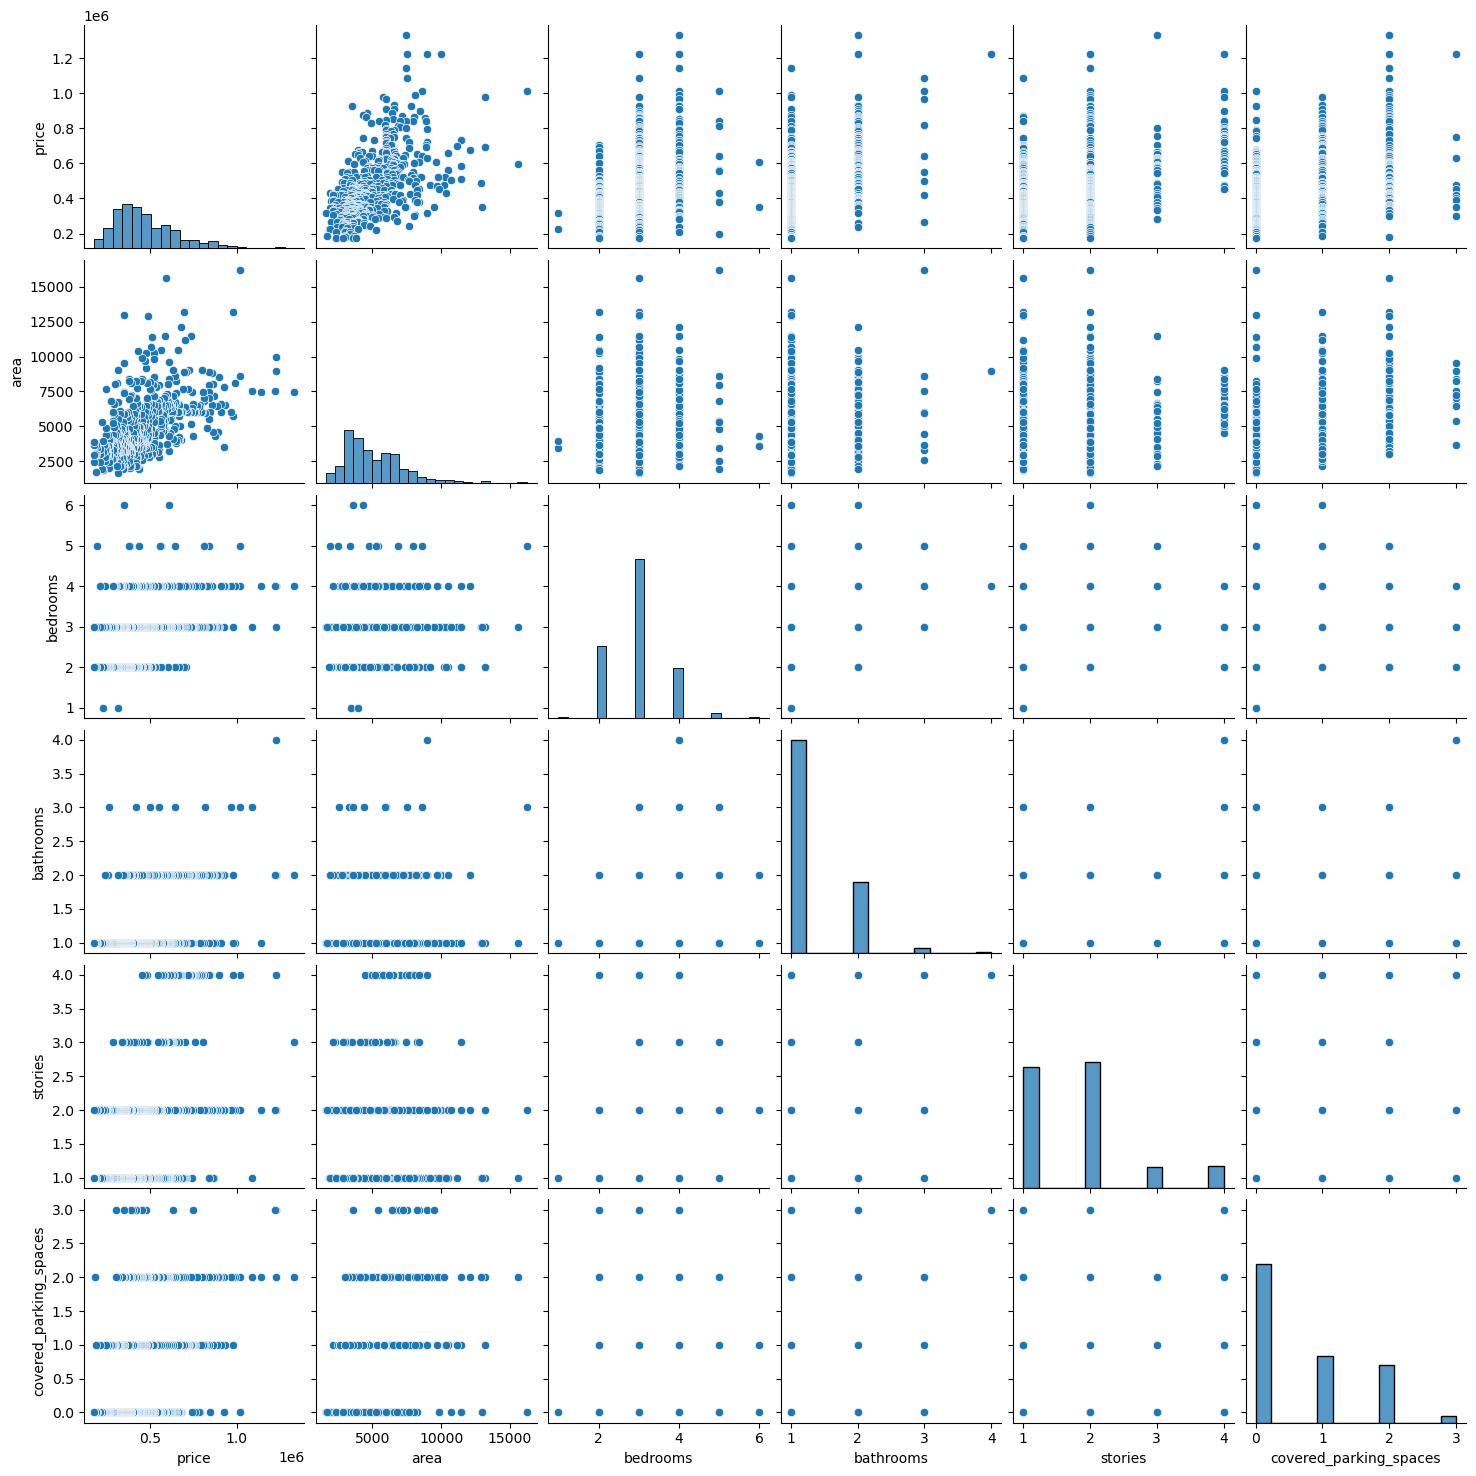

In [5]:
sns.pairplot(df)

In [6]:
model1 = sm.OLS.from_formula('price ~ area', df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           7.39e-42
Time:                        20:30:33   Log-Likelihood:                -7296.3
No. Observations:                 545   AIC:                         1.460e+04
Df Residuals:                     543   BIC:                         1.461e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.387e+05   1.74e+04     13.681      0.000    2.04e+05    2.73e+05
area          46.1975      3.123     14.795      0.000      40.064      52.331
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#Gather Regression Statistics
rsquared1 = results1.rsquared
adj_rsquared1 = results1.rsquared_adj
parameters1 = results1.params
tvalues1 = results1.tvalues
pvalues1 = results1.pvalues
fstat1 = results1.fvalue
aic1 = results1.aic
bic1 = results1.bic
ci1 = results1.conf_int(alpha=0.01)

In [8]:
#Gather fitted values and residuals
yhat1 = results1.fittedvalues
e1 = results1.resid

In [9]:
model2 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms', df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     171.3
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           4.80e-78
Time:                        20:30:33   Log-Likelihood:                -7206.7
No. Observations:                 545   AIC:                         1.442e+04
Df Residuals:                     541   BIC:                         1.444e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.732e+04   2.65e+04     -0.655      0.513   -6.93e+04    3.47e+04
area          37.8763      2.716     13.948      0.000      32.542      43.211
bedrooms    4.068e+04   8445.788      4.817      0.000    2.41e+04    5.73e+04
bathrooms   1.386e+05   1.25e+04     11.089      0.000    1.14e+05    1.63e+05
==============================================================================
Omnibus:                       70.408   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.930
Skew:                           0.738   Prob(JB):                     9.19e-32
Kurtosis:                       5.029   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Recode categorical variables as binary
df = pd.get_dummies(df, drop_first=True)
df.head()
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'covered_parking_spaces', 'fireplace_yes', 'basement_yes',
       'central_air_yes', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [22]:
model3 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms + covered_parking_spaces + basement_yes', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     117.8
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           4.51e-84
Time:                        20:32:27   Log-Likelihood:                -7187.4
No. Observations:                 545   AIC:                         1.439e+04
Df Residuals:                     539   BIC:                         1.441e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -9057.1070   2.57e+04     -0.352      0.725   -5.96e+04    4.15e+04
area                      33.1254      2.777     11.929      0.000      27.670      38.580
bedrooms                3.658e+04   8193.540      4.465      0.000    2.05e+04    5.27e+04
bathrooms                 1.3e+05   1.22e+04     10.687      0.000    1.06e+05    1.54e+05
covered_parking_spaces  3.494e+04   6969.504      5.013      0.000    2.12e+04    4.86e+04
basement_yes            4.341e+04   1.18e+04      3.694      0.000    2.03e+04    6.65e+04
==============================================================================
Omnibus:                       50.480   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.642
Skew:                           0.592   Prob(JB):                     3.42e-20
Kurtosis:                       4.595   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


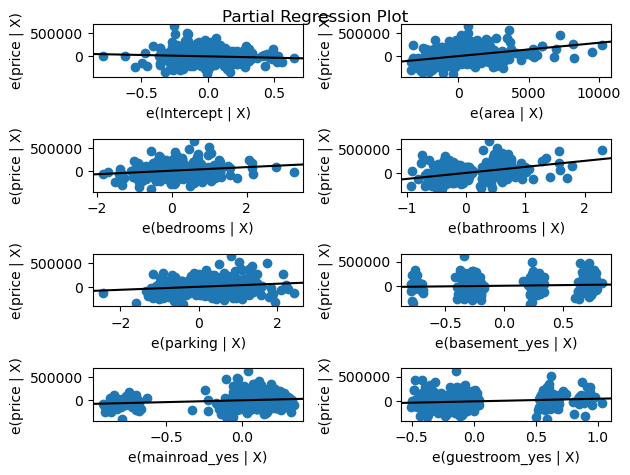

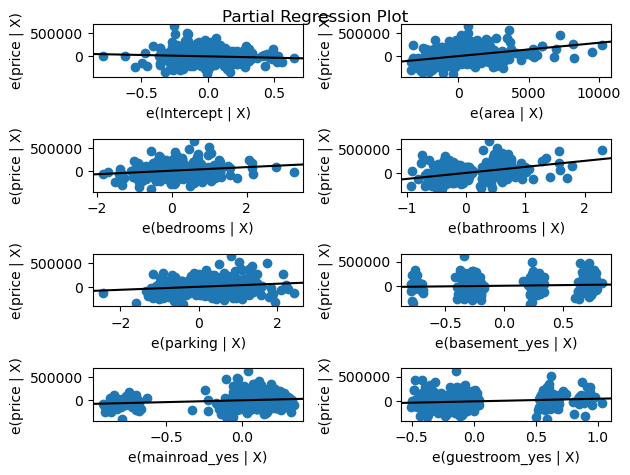

In [17]:
sm.graphics.plot_partregress_grid(results3)


In [24]:
model3 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms + basement_yes', df)
results3 = model3.fit()
predictions = pd.DataFrame({'bedrooms': [1, 2, 3, 4, 5],
                            'bathrooms': [1, 2, 1, 2, 1],
                            'area':[2000,2000,1500,2000,3500],
                            'basement_yes':[1,0,1,0,1]})

predictions['estimated price'] = results3.predict(predictions)
print(predictions)

   bedrooms  bathrooms  area  basement_yes  estimated price
0         1          1  2000             1    272196.422917
1         2          2  2000             0    401695.173941
2         3          1  1500             1    330878.369624
3         4          2  2000             0    479200.928779
4         5          1  3500             1    483679.356988


In [31]:
model3 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms + basement_yes', df)
results3 = model3.fit()
predictions['estimated price'] = results3.predict(df)

In [39]:
dfx = pd.DataFrame()
dfx['Actual'] = df['price']
dfx['Predicted'] = predictions['estimated price']
dfx['Difference'] = dfx['Predicted'] - dfx['Actual']
dfx['Difference'].sort_values(ascending=True)
#Best deals?

0     -646748.991076
4     -548494.864681
3     -490471.294128
2     -440111.035540
1     -212748.139527
           ...      
540              NaN
541              NaN
542              NaN
543              NaN
544              NaN
Name: Difference, Length: 545, dtype: float64

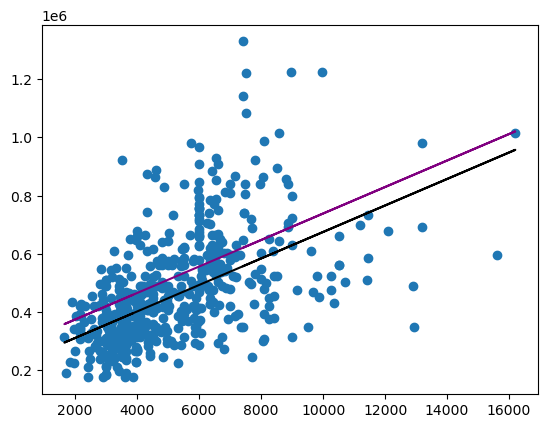

In [71]:
model = sm.OLS.from_formula('price ~ area + basement_yes', data=df).fit()
price = df.price
area = df.area

b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]

price_wo_basement = b0 + (b1 * area) + (b2 * 0)
price_w_basement = b0 + (b1 * area) + (b2 * 1)

plt.scatter(area,price)
plt.plot(area, price_wo_basement, color='black')
plt.plot(area, price_w_basement, color='purple')

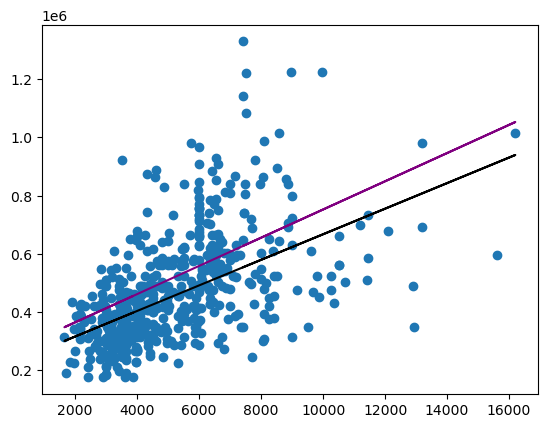

In [81]:
#Categorical interaction term
model = sm.OLS.from_formula('price ~ area + basement_yes + area:basement_yes', data=df).fit()
price = df.price
area = df.area
basement_yes = df.basement_yes
areaXbasement_yes = area * basement_yes

b0 = model.params[0] #intercept
b1 = model.params[1] #area
b2 = model.params[2] #basement_yes
b3 = model.params[3] #interaction


price_wo_basement = b0 + (b1 * area) + (b2 * 0) + (b3 * area * 0)
price_w_basement = b0 + (b1 * area) + (b2 * 1) + (b3 * area * 1)

plt.scatter(area,price)
plt.plot(area, price_wo_basement, color='black')
plt.plot(area, price_w_basement, color='purple')

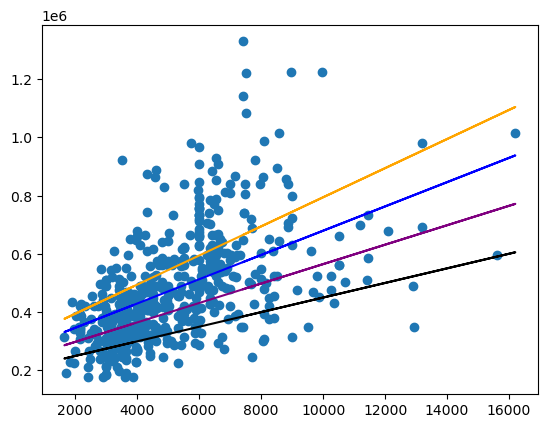

In [80]:
#More interaction
model = sm.OLS.from_formula('price ~ area + bedrooms + area:bedrooms', data=df).fit()
price = df.price
area = df.area
bedrooms = df.bedrooms
areaXbedrooms = area * bedrooms

b0 = model.params[0] #intercept
b1 = model.params[1] #area
b2 = model.params[2] #bedrooms
b3 = model.params[3] #interaction


price_w_1br = b0 + (b1 * area) + (b2 * 1) + (b3 * area * 1)
price_w_2br = b0 + (b1 * area) + (b2 * 2) + (b3 * area * 2)
price_w_3br = b0 + (b1 * area) + (b2 * 3) + (b3 * area * 3)
price_w_4br = b0 + (b1 * area) + (b2 * 4) + (b3 * area * 4)


plt.scatter(area,price)
plt.plot(area, price_w_1br, color='black')
plt.plot(area, price_w_2br, color='purple')
plt.plot(area, price_w_3br, color='blue')
plt.plot(area, price_w_4br, color='orange')

In [82]:
#Comparing models

models = ['model1','model2','model3']
r_squared = [results1.rsquared, results2.rsquared, results3.rsquared]
adj_r_squared = [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj]
aic = [results1.aic, results2.aic, results3.aic]
bic = [results1.bic, results2.bic, results3.bic]

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared           AIC           BIC
0  model1   0.287293            0.285981  14596.676566  14605.278138
1  model2   0.487083            0.484239  14421.395399  14438.598542
2  model3   0.499950            0.496246  14409.548998  14431.052927
